## Project Overview
Go through the DS pipeline and create a model that will predict whether a customer will stay or churn based off drivers.

## Project Goal
- Find drivers for customer churn at Telco.

- Construct a ML classification model that accurately predicts customer churn.

- The goal is to have a model perform better than the baseline one, and optimize recall.

In [1]:
#Essential import 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Turn off warning 
import warnings
warnings.filterwarnings("ignore")

#Import env file
from env import user_name, password, host

#Import functions from acquire, prepare, explore and model from directory
import acquire
import prepare
import explore
import modeling

#Sklearn to help with machine learning 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

## Acquire Telco_Churn Data

In [2]:
#This will get the function from acquire that is connect to the codeup database
#First it will execute the SQL query, return a dataframe and then create a csv file in directory
df = acquire.get_telco_data()

In [3]:
#Checking the function if working properly and return correct data
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,Yes,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,No,No,No,No,Yes,1,No,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,No,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,Yes,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,No,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


In [4]:
#Want to see the data type of each columns and how many rows and columns in the telco dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 7043 non-null   object 
 1   gender                      7043 non-null   object 
 2   senior_citizen              7043 non-null   int64  
 3   partner                     7043 non-null   object 
 4   dependents                  7043 non-null   object 
 5   tenure                      7043 non-null   int64  
 6   phone_service               7043 non-null   object 
 7   multiple_lines              7043 non-null   object 
 8   internet_service_type_id    7043 non-null   int64  
 9   online_security             7043 non-null   object 
 10  online_backup               7043 non-null   object 
 11  device_protection           7043 non-null   object 
 12  tech_support                7043 non-null   object 
 13  streaming_tv                7043 

## Prepare Telco_Churn Data

In [5]:
df = prepare.clean_data(df)

In [6]:
train, validate, test = prepare.split_data(df)

In [7]:
print('train shape    :',train.shape)
print('validate shape :',validate.shape)
print('test shape     :',test.shape)

train shape    : (3943, 28)
validate shape : (1691, 28)
test shape     : (1409, 28)


## Data Exploration

<AxesSubplot:title={'center':'Feautures Correlating with Churn'}>

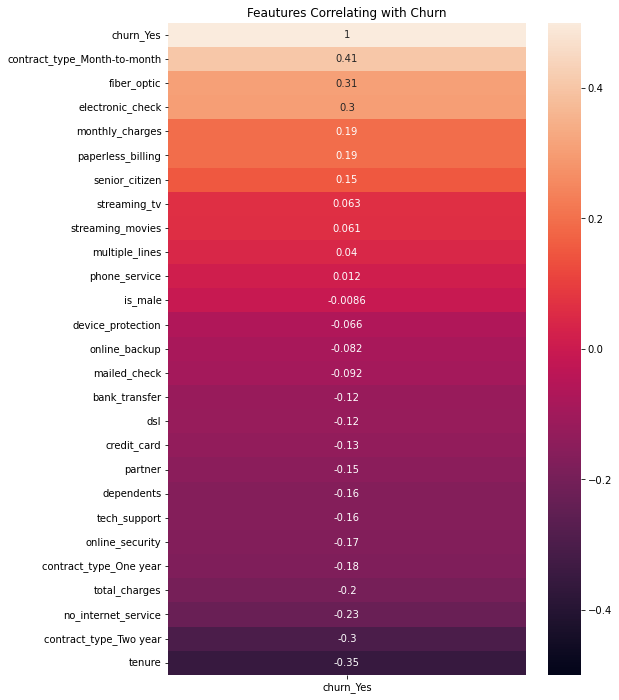

In [8]:
#Heatmap will tell us each feature is releated to churn
explore.get_churn_heatmap(df)

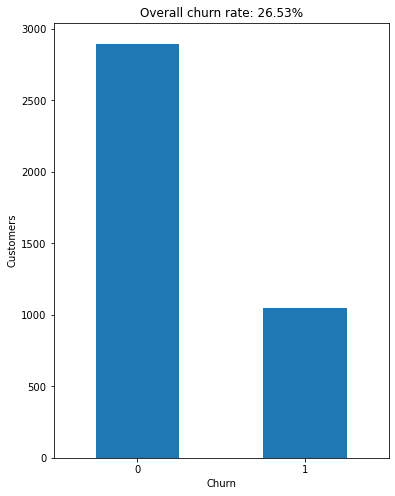

In [9]:
#Calculate the overall churn rate and create a bar plot 
explore.churn_bar(train)

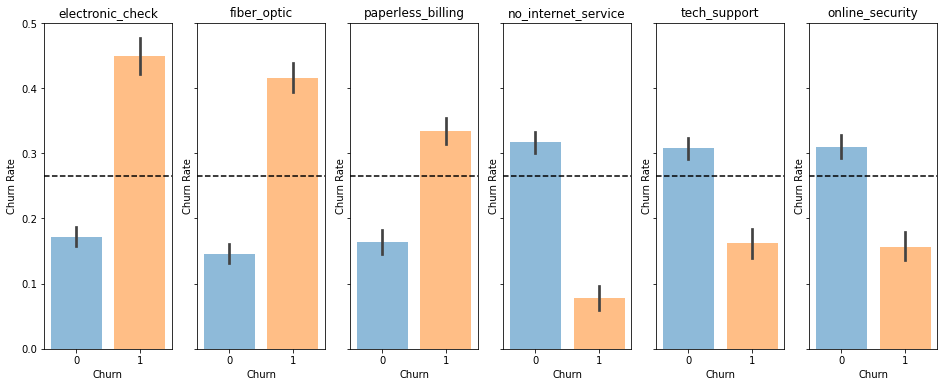

In [10]:
#We plot features with more correlation
features = ['electronic_check','fiber_optic','paperless_billing','no_internet_service','tech_support','online_security']
explore.bar_plot(features, train)

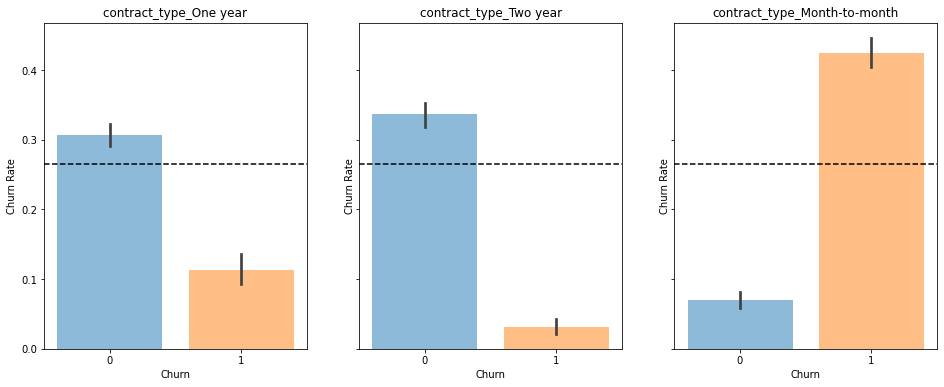

In [11]:
#Same as above
features = ['contract_type_One year','contract_type_Two year','contract_type_Month-to-month']
explore.bar_plot(features, train)

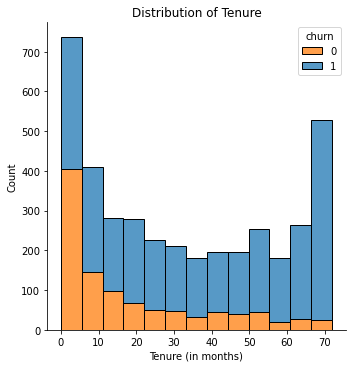

In [12]:
#We select driver(tenure)
explore.plot_tenure(train,'tenure')

In [13]:
#Checking the first month of tenure since it has the high churn rate
explore.report_tenure(train, 1)


** FIRST 1 MONTHS OF TENURE AND CHURN** 

Total customer in the first month: 341
Total customer cancellations in the first month: 212

Churn rate in the first month of Tenure: 62.17%
Paperless_billing:                       66.51%
Electronic_check payment type :          57.08% 
Fiber_optic:                             53.30%

Overall Churn Rate: 26.53%
